In [1]:
!pip install pandas numpy tensorflow keras sklearn matplotlib

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [1]:
import pandas as pd

train = pd.read_csv('../Deep-Learning-project/dataset/training.csv')
test = pd.read_csv('../Deep-Learning-project/dataset/test.csv')
validation = pd.read_csv('../Deep-Learning-project/dataset/validation.csv')

In [2]:
!pip install nltk

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokenized = word_tokenize(text)  # tokenize text
    cleaned_text = [word for word in tokenized if word not in stopwords.words('english')]  # remove stopwords
    return " ".join(cleaned_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chethanats/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chethanats/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
train['cleaned_text'] = train['text'].apply(preprocess_text)
test['cleaned_text'] = test['text'].apply(preprocess_text)
validation['cleaned_text'] = validation['text'].apply(preprocess_text)

labels_dict = {0:'sad', 1:'happy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['emotion'] = train['label'].map(labels_dict)
test['emotion'] = test['label'].map(labels_dict)
validation['emotion'] = validation['label'].map(labels_dict)

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['cleaned_text'])

X_train = tokenizer.texts_to_sequences(train['cleaned_text'])
X_test = tokenizer.texts_to_sequences(test['cleaned_text'])
X_val = tokenizer.texts_to_sequences(validation['cleaned_text'])

# Pad sequences
max_length = max(max(len(x) for x in X_train), max(len(x) for x in X_test), max(len(x) for x in X_val))
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')
X_val = pad_sequences(X_val, maxlen=max_length, padding='post')

# Encode labels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['emotion'])

y_train = encoder.transform(train['emotion'])
y_test = encoder.transform(test['emotion'])
y_val = encoder.transform(validation['emotion'])

In [5]:
test.head()

,text,label,cleaned_text,emotion
0,im feeling rather rotten so im not very ambiti...,0,im feeling rather rotten im ambitious right,sad
1,im updating my blog because i feel shitty,0,im updating blog feel shitty,sad
2,i never make her separate from me because i do...,0,never make separate ever want feel like ashamed,sad
3,i left with my bouquet of red and yellow tulip...,1,left bouquet red yellow tulips arm feeling sli...,happy
4,i was feeling a little vain when i did this one,0,feeling little vain one,sad


**RNN Model without droupout layer**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

vocab_size = len(tokenizer.word_index) + 1  # Plus 1 for padding

model_1 = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(SimpleRNN(256, return_sequences=False))
model.add(Dense(6, activation='softmax'))  # 6 for the number of emotion categories

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**RNN Model with droupout**

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

vocab_size = len(tokenizer.word_index) + 1  # Plus 1 for padding

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(SimpleRNN(256, return_sequences=False))
model.add(Dropout(0.5))  # Add dropout layer with 50% dropout rate
model.add(Dense(6, activation='softmax'))  # 6 for the number of emotion categories

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
num_epochs = 100
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=128)

Epoch 1/100
125/125 [==============================] - 6s 46ms/step - loss: 1.4614 - accuracy: 0.4264 - val_loss: 1.0665 - val_accuracy: 0.6095
Epoch 2/100
125/125 [==============================] - 6s 48ms/step - loss: 0.8285 - accuracy: 0.7122 - val_loss: 0.7675 - val_accuracy: 0.7465
Epoch 3/100
125/125 [==============================] - 6s 52ms/step - loss: 0.4230 - accuracy: 0.8591 - val_loss: 0.6978 - val_accuracy: 0.7770
Epoch 4/100
125/125 [==============================] - 7s 56ms/step - loss: 0.2453 - accuracy: 0.9219 - val_loss: 0.7388 - val_accuracy: 0.7660
Epoch 5/100
125/125 [==============================] - 7s 60ms/step - loss: 0.1657 - accuracy: 0.9503 - val_loss: 0.7686 - val_accuracy: 0.7710
Epoch 6/100
125/125 [==============================] - 8s 60ms/step - loss: 0.1362 - accuracy: 0.9594 - val_loss: 0.8870 - val_accuracy: 0.7780
Epoch 7/100
125/125 [==============================] - 8s 65ms/step - loss: 0.1050 - accuracy: 0.9684 - val_loss: 0.9500 - val_accuracy:

In [8]:
!pip install pydot
!pip install graphviz

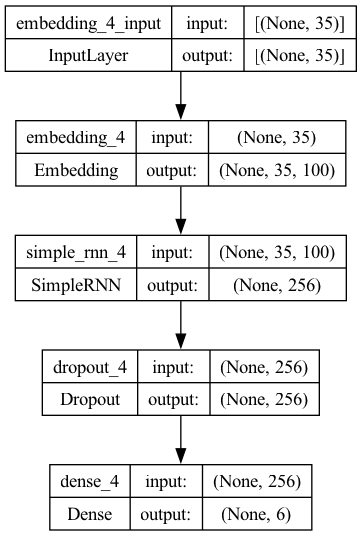

In [86]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [87]:
total_loss = 0
total_accuracy = 0
for epoch, (loss, acc) in enumerate(zip(history.history['loss'], history.history['accuracy'])):
    total_loss += loss
    total_accuracy += acc

average_loss = total_loss / num_epochs
average_accuracy = total_accuracy / num_epochs
print(f'Average Loss: {average_loss}, Average Accuracy: {average_accuracy}')

Average Loss: 0.08882525227963925, Average Accuracy: 0.9724193745851517


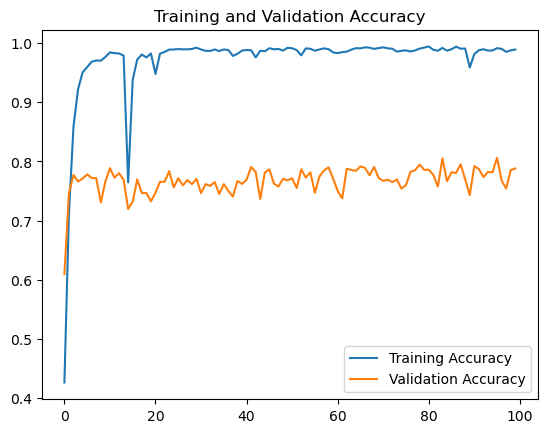

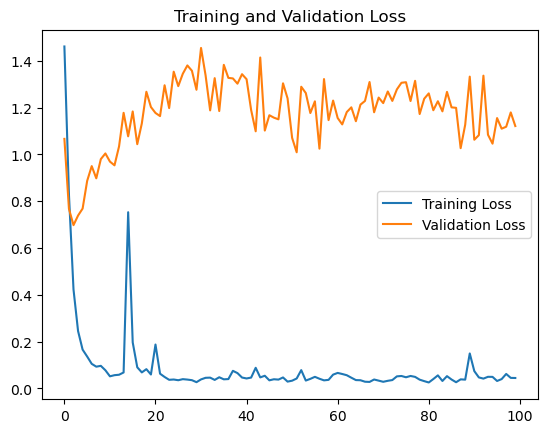

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [89]:
def predict_emotion(text):
    # Preprocess and tokenize the input text
    seq = tokenizer.texts_to_sequences([preprocess_text(text)])
    # Pad the sequence
    padded_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    # Perform the prediction
    prediction = model.predict(padded_seq)
    # Decode the prediction
    label_idx = prediction.argmax(axis=1)[0]
    return encoder.inverse_transform([label_idx])[0]

# Example usage
input_text = input("Enter some sentence:")
predict_emotion(input_text)


Enter some sentence:i love deep learning
1/1 [==============================] - 0s 105ms/step


'happy'

In [90]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Predict probabilities for the validation set
probabilities = model.predict(X_val)
# Convert probabilities to class labels
predictions = np.argmax(probabilities, axis=1)

print(accuracy_score(y_val, predictions))
print(classification_report(y_val, predictions))


63/63 [==============================] - 0s 5ms/step
0.788
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       275
           1       0.70      0.68      0.69       212
           2       0.89      0.82      0.85       704
           3       0.62      0.63      0.63       178
           4       0.81      0.89      0.85       550
           5       0.52      0.69      0.59        81

    accuracy                           0.79      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.79      0.79      0.79      2000



In [91]:
# Tokenize the test text data
X_test = tokenizer.texts_to_sequences(test['cleaned_text'])
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Encode the labels if they are categorical
y_test = encoder.transform(test['emotion'])

# Predict probabilities for the test set
probabilities = model.predict(X_test)
# Convert probabilities to class labels
predictions = np.argmax(probabilities, axis=1)

# Evaluate the performance of the RNN model on the test set
test_accuracy = accuracy_score(y_test, predictions)*100
test_report = classification_report(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Classification Report on Test Data:\n", test_report)


63/63 [==============================] - 0s 5ms/step
Test Accuracy: 76.95
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69       275
           1       0.68      0.75      0.71       224
           2       0.89      0.79      0.84       695
           3       0.53      0.64      0.58       159
           4       0.82      0.86      0.84       581
           5       0.41      0.53      0.46        66

    accuracy                           0.77      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.78      0.77      0.77      2000

